Part 1: Image classification

    1. Set your random seed to 1234

In [1]:
# import random
# random.seed(1234)

# import numpy as np
# import matplotlib.pyplot as plt

# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers.core import Dense, Dropout, Activation
# from keras.utils import np_utils

# from sklearn.model_selection import train_test_split

/software/Anaconda3-5.0.1-el7-x86_64/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


2.Load the MNIST dataset

In [23]:
# nb_classes = 10

# (X_train, y_train), (X_test, y_test) = mnist.load_data() 

# X_train = X_train.reshape(60000, 784).astype('float32') / 255
# X_test = X_test.reshape(10000, 784).astype('float32') / 255

# Y_train = np_utils.to_categorical(y_train, nb_classes)
# Y_test = np_utils.to_categorical(y_test, nb_classes)

# X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.16666, random_state = 1234)

3.Implement a series of neural network models

    i.Initial test

In [ ]:
# model = Sequential()
# model.add(Dense(512, input_shape=(784,)))
# model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
#                               # of the layer above. Here, with a "rectified linear unit",
#                               # we clamp all values below 0 to 0.
                           
# model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data, #防止过拟合
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10))
# model.add(Activation('softmax')) # This special "softmax" activation among other things,
#                                  # ensures the output is a valid probaility distribution, that is
#                                  # that its values are all non-negative and sum to 1.

In [1]:
import random
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

random.seed(1234)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images, valid_images, train_labels, valid_labels = \
    train_test_split(train_images, train_labels, test_size = 0.16666, random_state = 1234)

/software/Anaconda3-5.0.1-el7-x86_64/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result = network.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=50, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 190us/step - loss: 14.2084 - acc: 0.1024 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 2/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 3/50
50000/50000 [==============================] - 9s 186us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 4/50
50000/50000 [==============================] - 9s 186us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 5/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 6/50
50000/50000 [==============================] - 9s 186us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 7/50
50000/50000 [==============================] - 9s 186us/step - loss: 14.3213 - acc: 0.1115 - val_l

In [3]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
valid_loss, valid_acc = network.evaluate(valid_images, valid_labels)

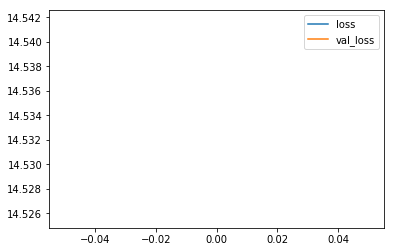

In [44]:
loss = history.history['loss']
val_loss = result.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

ii. Implement dropout